<a href="https://colab.research.google.com/github/johnkevinoregan/Learning-Relations-with-Deep-Learning/blob/main/Copy2_of_Kevs_CNN_for_comparisons_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating data

In [ ]:
#K Generate training samples
#PixToSkip is the number of retinal pixels inbetween two successive retinal locations where there can be a training sample. You can use the value 0 if you dont want to skip locations.
#LeftNumToTrain is the number of retinal locations on the left side of the retina you want to train
#NumInHole is the number of those retinal locations in the center of the retina where you choose not to train (in order to test generalization)
#RightNumToTrain is the number of retinal locations on the right side of the retina you want to train
#As an example : generate_training_set(0,4,0,4) generates a training set with a retina of size 8 where all locations will be trained (+'s) and there is no hole: ++++++++ 
#generate_training_set(0,4,3,4) does the same except now there is a hole where there is no training (.'s): ++++...++++ (the retina is now of length 11)
#generate_training_set(1,4,3,4) does the same again, except now there are also skipped pixels inbetween all the training locations: +.+.+.+......+.+.+.+

def generate_training_set(PixToSkip,LeftNumToTrain,NumInHole,RightNumToTrain): 
  TotNumToTrain=LeftNumToTrain+RightNumToTrain
  LastRetinaPixel=(TotNumToTrain+NumInHole-1)*(PixToSkip+1)
  Midpoint=LastRetinaPixel/2
  #print(Midpoint)
  X_trials=[[0 for col in range(LastRetinaPixel+1)] for row in range(TotNumToTrain)]
  StepInterval=PixToSkip+1
  i=0
  for j in range(LeftNumToTrain):
    retpos=j*StepInterval
    #print(i,retpos)
    X_trials[i][retpos]=1
    #print(X_trials[i])
    i+=1
    #print('left')
  #for j in range(NumInHole):
  #  retpos=(LeftNumToTrain+j)*StepInterval
  #  #print(i,retpos)
  #  X_trials[i][retpos]=1
  #  #print(X_trials[i])
  #  i+=1
  #  #print('hole')
  for j in range(RightNumToTrain):
    retpos=(LeftNumToTrain+NumInHole+j)*StepInterval
    #print(i,retpos)
    X_trials[i][retpos]=1
    #print(X_trials[i])
    i+=1
    #print('right')

  return(X_trials)

#K This function generates a list of all the possible tests 
#you give it the same parameters as for the training set so it can calculate how long the retina is
def generate_test_set(PixToSkip,LeftNumToTrain,NumInHole,RightNumToTrain):
  TotNumToTrain=LeftNumToTrain+RightNumToTrain
  RetinaSize=(TotNumToTrain+NumInHole-1)*(PixToSkip+1)+1
  AllPossTests=[[0 for row in range(RetinaSize)] for col in range(RetinaSize)]
  for i in range(RetinaSize):
     AllPossTests[i][i]=1
  return(AllPossTests)


# K generate labels based on the index of 1 in each row of the Training or Test set
def generate_labels(Set):
  Labels = [1 if row.index(1) >= (len(row)-1)/2 else 0 for row in Set]
  return Labels


In [ ]:
X_trainMain=generate_training_set(2,10,10,10)

print(X_trainMain)
np.random.shuffle(X_trainMain)
print(X_trainMain)

[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
#K example of use of the functions
X_train=generate_training_set(2,10,10,10)
#np.random.shuffle(X_train)
y_train=generate_labels(X_train)
print('training set')
for i in range(len(X_train)):
  print(X_train[i], 'label', y_train[i])
print()

X_test=generate_test_set(2,10,10,10)
y_test=generate_labels(X_test)
print('test set')
for i in range(len(X_test)):
  print(X_test[i], 'label', y_test[i])
print()


training set
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] label 0
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] label 0
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] label 0
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from sklearn.model_selection import train_test_split

In [ ]:
#Don't run this
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size=0.2, random_state=42)

#CNN

In [ ]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(len(X_train[0]), 1)))
model.add(MaxPooling1D(pool_size=2))
#model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
#model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

Epoch 1/20
1/1 [==============================] - 1s 847ms/step - loss: 0.6913 - accuracy: 0.6000
Epoch 2/20
1/1 [==============================] - 0s 15ms/step - loss: 0.6808 - accuracy: 0.7500
Epoch 3/20
1/1 [==============================] - 0s 14ms/step - loss: 0.6704 - accuracy: 0.9500
Epoch 4/20
1/1 [==============================] - 0s 15ms/step - loss: 0.6603 - accuracy: 1.0000
Epoch 5/20
1/1 [==============================] - 0s 17ms/step - loss: 0.6507 - accuracy: 1.0000
Epoch 6/20
1/1 [==============================] - 0s 19ms/step - loss: 0.6408 - accuracy: 1.0000
Epoch 7/20
1/1 [==============================] - 0s 17ms/step - loss: 0.6304 - accuracy: 1.0000
Epoch 8/20
1/1 [==============================] - 0s 14ms/step - loss: 0.6195 - accuracy: 1.0000
Epoch 9/20
1/1 [==============================] - 0s 20ms/step - loss: 0.6079 - accuracy: 1.0000
Epoch 10/20
1/1 [==============================] - 0s 13ms/step - loss: 0.5954 - accuracy: 1.0000
Epoch 11/20
1/1 [===========

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print("Accuracy:", accuracy)

3/3 [==============================] - 0s 5ms/step - loss: 0.5266 - accuracy: 0.7841
Accuracy: 0.7840909361839294


In [ ]:


RetinaSize=len(X_test[0])
#results=[0 for col in range(RetinaSize)]
results=[0]*(RetinaSize)
counter=0
for i in range(RetinaSize):
  pred=model.predict(np.array([X_test[i]]))
  results[i]=pred[0][0]
  if results[i]<0.5:
    estimate=0
  else:
    estimate=1 

  if (y_test[i]==estimate):
    counter+=1

print(results)
print('count', counter, 'out of', RetinaSize+1, 'proportion', counter/(RetinaSize+1))



1/1 [==============================] - 0s 28ms/step
[0.39882222, 0.38416907, 0.3307554, 0.32207412, 0.3631821, 0.37702936, 0.3159954, 0.3496303, 0.32030937, 0.31125018, 0.34030315, 0.3343277, 0.29802322, 0.33709615, 0.32646802, 0.30674022, 0.32935333, 0.3544423, 0.30284402, 0.33538234, 0.32991776, 0.32571974, 0.34262025, 0.35868496, 0.30711713, 0.3504358, 0.32847658, 0.30440518, 0.38876942, 0.4386424, 0.4902022, 0.48654917, 0.48323986, 0.484847, 0.466005, 0.4694732, 0.48807907, 0.49155414, 0.5038829, 0.5074329, 0.526071, 0.5292702, 0.5102862, 0.50066066, 0.49775043, 0.5104553, 0.48783645, 0.478403, 0.4621367, 0.45928288, 0.4796962, 0.4759948, 0.46864492, 0.4808487, 0.483659, 0.48226047, 0.49957404, 0.49386168, 0.5409054, 0.5783939, 0.6628358, 0.6187521, 0.63030475, 0.64574516, 0.6182931, 0.59731466, 0.653744, 0.62446564, 0.6528428, 0.6684665, 0.63661265, 0.6166534, 0.65879315, 0.6202721, 0.62906975, 0.63988644, 0.62502736, 0.6059227, 0.66397387, 0.62547386, 0.64462554, 0.65298504, 0.63

In [ ]:
import numpy as np
arr = np.array(results)
print(np.round(arr, decimals=2))

[0.41 0.39 0.29 0.3  0.37 0.38 0.29 0.32 0.29 0.29 0.35 0.37 0.27 0.3
 0.29 0.29 0.37 0.4  0.27 0.29 0.3  0.31 0.39 0.39 0.3  0.35 0.32 0.3
 0.43 0.5  0.54 0.53 0.53 0.52 0.52 0.51 0.51 0.5  0.51 0.51 0.51 0.51
 0.5  0.51 0.53 0.53 0.52 0.5  0.52 0.52 0.5  0.49 0.49 0.51 0.5  0.49
 0.52 0.52 0.55 0.59 0.72 0.69 0.74 0.74 0.66 0.65 0.72 0.68 0.68 0.68
 0.63 0.62 0.74 0.72 0.72 0.72 0.64 0.61 0.72 0.7  0.72 0.72 0.64 0.61
 0.73 0.72 0.65 0.6 ]


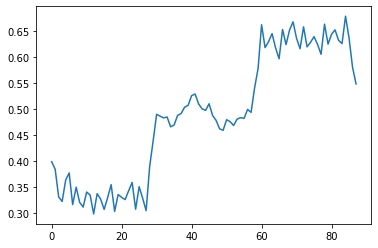

In [ ]:
import matplotlib.pyplot as plt
plt.plot(results)

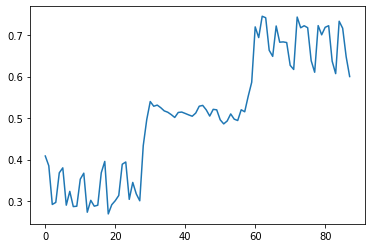

In [ ]:
import matplotlib.pyplot as plt
plt.plot(results)

In [ ]:


import numpy as np
RetinaSize=len(X_test[0])
#results=[0 for col in range(RetinaSize)]
#results=[0]*(RetinaSize+1)
results = np.empty(RetinaSize+1, dtype=object)

counter=0
for i in range(RetinaSize):
  pred=model.predict(np.array([X_test[i]]))
  results[i]=pred[0][0]
  if results[i]<0.5:
    estimate=0
  else:
    estimate=1 

  if (y_test[i]==estimate):
    counter+=1

print(results)
print('count', counter, 'out of', RetinaSize+1, 'proportion', counter/(RetinaSize+1))



1/1 [==============================] - 0s 30ms/step
[0.2525708 0.08815794 0.03427393 0.027196057 0.0028002197 0.0016949082
 0.0011095707 0.0017959499 0.00080456835 0.0011896153 0.003107872
 0.003892611 0.0010014819 0.0012588048 0.0022400196 0.002814823
 0.001007917 0.0014182762 0.00252672 0.0036529172 0.0012643323
 0.0014516722 0.002641178 0.0032686484 0.0010214807 0.0015171387
 0.0026405887 0.0040809163 0.021111544 0.08856517 0.3786319 0.4899508
 0.8019369 0.88683224 0.9427455 0.94061667 0.9521985 0.9500313 0.9422414
 0.9355003 0.9480499 0.9461948 0.9320259 0.9324668 0.9477067 0.9480411
 0.9471064 0.944768 0.953882 0.95410013 0.94959074 0.94383436 0.9704842
 0.9741729 0.97233325 0.97355914 0.9939255 0.9967052 0.99818814 0.9980569
 0.99971074 0.9996976 0.9996007 0.99953246 0.99976057 0.9997125 0.9995924
 0.9994308 0.99975014 0.99973017 0.99950355 0.99935883 0.9997534 0.9996999
 0.9995424 0.9994527 0.99976015 0.99971855 0.9996267 0.99957687 0.9994215
 0.9984826 0.99437124 0.99044573 0.9

In [ ]:
print("%.1f" % results)


TypeError: ignored

In [ ]:
resultsArray=np.array(results)
print("%.1f" % resultsArray)


In [ ]:
pred=model.predict(np.array([X_test[0]]))
print()
print()
print('pred[0][0]',pred[0][0])
print()
print('pred',pred)


1/1 [==============================] - 0s 30ms/step


pred[0][0] 0.2525708

pred [[0.2525708]]


In [ ]:
  prediction = model.predict(np.array([new_sequence]))
  print("Prediction:", prediction[0][0])

In [ ]:
# Use the model to make predictions on a new sequence
i = 0
trails = 20
counter =0
while(i< trails):
  new_sequence = generate_sequence(n=1, m=len(X_train[0]))[0]
  print("New sequence:", new_sequence)

  prediction = model.predict(np.array([new_sequence]))
  print("Prediction:", prediction[0][0])
  print("275 index:", new_sequence.index(275))
  if new_sequence.index(275) >= (len(new_sequence)-1)/2:
    label_newSequence = 1
  else:
    label_newSequence = 0

  if(prediction[0][0]>.5):
    estimate =1
  else:
    estimate =0

  if(label_newSequence == estimate):
    print('correct')
    counter+=1

  else:
    print('wrong')
  print('estimate:', estimate)
  print('label:', label_newSequence)
  i+=1
print('-----------------------')
print('-----------------------')
print('No. of trails:', trails)
print('no. of corrects:', counter)

New sequence: [125, 20, 41, 34, 147, 10, 236, 38, 248, 222, 243, 255, 161, 13, 32, 103, 53, 206, 155, 139, 263, 172, 107, 25, 224, 5, 6, 65, 88, 151, 87, 67, 227, 42, 54, 213, 12, 9, 102, 227, 71, 242, 200, 262, 135, 275, 243, 68, 173, 70, 187, 264, 240, 221, 73, 246, 174, 2, 208, 51]
1/1 [==============================] - 0s 38ms/step
Prediction: 0.89642316
275 index: 45
correct
estimate: 1
label: 1
New sequence: [38, 49, 46, 202, 86, 236, 17, 104, 221, 245, 62, 167, 144, 171, 67, 109, 50, 44, 236, 209, 182, 230, 228, 246, 185, 275, 171, 265, 210, 151, 103, 252, 31, 199, 227, 58, 131, 111, 73, 115, 209, 135, 2, 214, 182, 215, 265, 268, 253, 163, 124, 27, 87, 231, 211, 172, 259, 92, 246, 168]
1/1 [==============================] - 0s 25ms/step
Prediction: 6.713404e-05
275 index: 25
correct
estimate: 0
label: 0
New sequence: [45, 60, 100, 59, 160, 20, 7, 28, 13, 101, 209, 12, 273, 41, 242, 60, 228, 127, 66, 10, 191, 163, 140, 73, 33, 235, 238, 168, 180, 108, 275, 199, 230, 248, 70, 230,